## Reto 4: Graficando múltiples axis

### 1. Objetivos:
    - Usar subplots para graficar múltiples gráficas de barras al mismo tiempo
 
---
    
### 2. Desarrollo:

En el Reto pasado generamos tablas de contingencia para segmentar nuestros datos usando dos o más variables categóricas. El problema con nuestras gráficas es que resultaba muy incómodo e ineficiente compararlas. Una manera mucho más efectiva de comparar varias gráficas es graficarlas en la misma figura. Tu Reto consiste en lo siguiente:

1. Lee el dataset 'melbourne_housing-clean.csv'.
2. Crea una tabla de contingencia donde el índice esté dado por la variable 'region_name' y las columnas por la variable 'type'. Esto nos va a dar una tabla donde tenemos la frecuencia de cada tipo de propiedad segmentada por regiones.
3. Genera una figura con 8 subplots para hacer gráficas de barras de cada región en nuestro dataset. Cada gráfica tendrá 3 barras, correspondiendo a los tipos 'h', 't' y 'u'.
4. Asegúrate de que compartan eje `x` y `y` para que sea fácil compararlas. Además agrega anotaciones y títulos donde creas necesario.
5. Describe tus hallazgos y comparte con tus compañeros qué podrían significar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/jaeem006/beduadp/master/Datasets/melbourne_housing-clean.csv", index_col = 0)
df.sample(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count
6165,Surrey Hills,34 Barton St,4,h,1850000.0,S,Nelson,22/05/2016,11.2,3127.0,3.0,2.0,2.0,632.0,Boroondara,-37.81730,145.10030,Southern Metropolitan,5457.0
11453,Surrey Hills,23 Bristol St,3,h,2225000.0,SA,Fletchers,22/07/2017,10.2,3127.0,4.0,2.0,2.0,2007.0,Whittlesea,-37.62591,145.07234,Southern Metropolitan,5457.0
10392,Melton,14 Musk Ct,3,h,295000.0,SP,PRDNationwide,27/05/2017,31.7,3337.0,3.0,1.0,4.0,600.0,Melton,-37.68734,144.58001,Western Victoria,3600.0


In [2]:
# 0. Cambiamos de codigos a nombres
df['type'] = df['type']\
             .apply(lambda x: dict(h='house', u='unit-duplex',t='townhouse')[x])

# 1. Crear una tabla de contigencia
df_region_name_rooms = pd.crosstab(df['region_name'], df['type'])
df_region_name_rooms

type,house,townhouse,unit-duplex
region_name,,,
Eastern Metropolitan,863,102,159
Eastern Victoria,33,0,3
Northern Metropolitan,2332,290,796
Northern Victoria,21,1,0
South-Eastern Metropolitan,224,20,28
Southern Metropolitan,2360,386,1478
Western Metropolitan,1908,226,394
Western Victoria,21,0,1


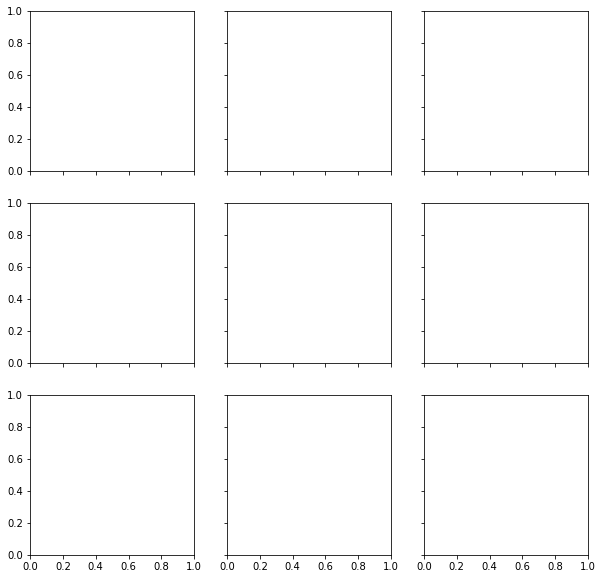

In [4]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize = (10,10),sharex=True, sharey=True)

Text(0.5, 0.935, 'Número de tipos de casas por region')

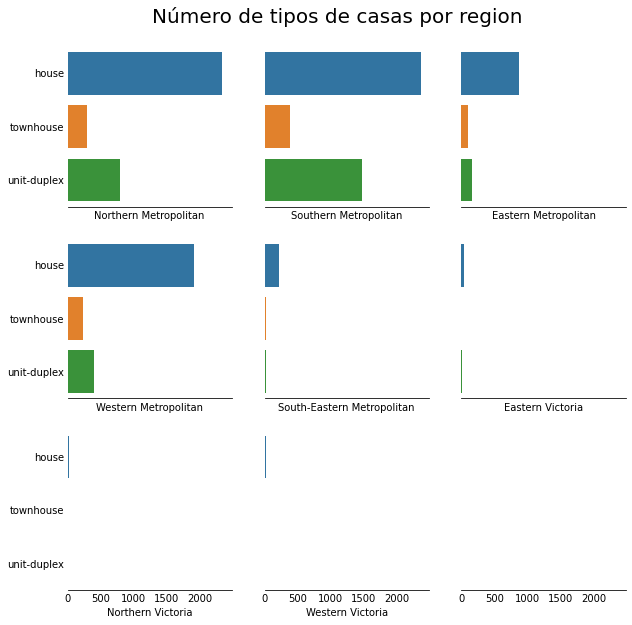

In [6]:
# 3. y 4. Generar subplots que compartan eje x y eje y
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(nrows=3, ncols=3,
                                                                  figsize = (10,10),
                                                                  sharex=True, sharey=True)
#fig.subplots_adjust(wspace=0.9)

sns.barplot(y = df_region_name_rooms.loc['Northern Metropolitan'].index,
            x = df_region_name_rooms.loc['Northern Metropolitan'],
            ax=ax)
sns.barplot(y = df_region_name_rooms.loc['Southern Metropolitan'].index,
            x = df_region_name_rooms.loc['Southern Metropolitan'],
            ax=ax2)
sns.barplot(y = df_region_name_rooms.loc['Eastern Metropolitan'].index,
            x = df_region_name_rooms.loc['Eastern Metropolitan'],
            ax=ax3)
sns.barplot(y = df_region_name_rooms.loc['Western Metropolitan'].index,
            x = df_region_name_rooms.loc['Western Metropolitan'],
            ax=ax4)
sns.barplot(y = df_region_name_rooms.loc['South-Eastern Metropolitan'].index,
            x = df_region_name_rooms.loc['South-Eastern Metropolitan'],
            ax=ax5)
sns.barplot(y = df_region_name_rooms.loc['Eastern Victoria'].index,
            x = df_region_name_rooms.loc['Eastern Victoria'],
            ax=ax6)
sns.barplot(y = df_region_name_rooms.loc['Northern Victoria'].index,
            x = df_region_name_rooms.loc['Northern Victoria'],
            ax=ax7)
sns.barplot(y = df_region_name_rooms.loc['Western Victoria'].index,
            x = df_region_name_rooms.loc['Western Victoria'],
            ax=ax8)

ax1.tick_params(length = 0)
ax2.tick_params(length = 0)
ax3.tick_params(length = 0)
ax4.tick_params(length = 0)
ax5.tick_params(length = 0)
ax6.tick_params(length = 0)
ax7.tick_params(length = 0)
ax8.tick_params(length = 0)
ax9.tick_params(length = 0)

sns.despine(left=True, right=True, top=True, bottom=False)

ax1.set_ylabel(None)
ax2.set_ylabel(None)
ax3.set_ylabel(None)
ax4.set_ylabel(None)
ax5.set_ylabel(None)
ax6.set_ylabel(None)
ax7.set_ylabel(None)
ax8.set_ylabel(None)
ax9.set_ylabel(None)


fig.suptitle("Número de tipos de casas por region", y = 0.935, fontsize = 20)